<a href="https://colab.research.google.com/github/dagyaom/Python_Practice/blob/main/%ED%86%B5%EA%B3%84%ED%95%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression(선형회귀)


< data preprocessing>

- 깨끗한 데이터

- outlier 제거

- data imbalance

- 피쳐고르기, 결측치제거, 학습 평가 세트분리 등

- 스케일링 : fit_transform, transform

<model 'deveolopment'> 

- ridge regression, 

- logistic regression, 

- random forest(분류)(data imbalance 잘 못잡는다), 

- xgboost(data imbalance해결에 너무 좋은 모델)

In [ ]:
# pip install -U pandas-profiling

In [ ]:
pip install --upgrade category_encoders   #원핫인코더에 필요

In [ ]:
import sklearn
sklearn.__version__

# sklearn 재설치
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

# sklearn 버전 재확인 -> 0.23 이상으로 설치되었는지 확인
import sklearn
sklearn.__version__


# 사이킷런 새로 설치해줘야, 

세연님 : 1. 기준모델과 MAE의 의미와 그것을 구하는 과정의 예시(211)

민석님 : 2. scikit-learn을 이용하여 단순 선형회귀를 진행하는 과정과 그 예시(211 212)

효섭님 : 3. 선형회귀모델의 계수의 의미와 그것을 구하는 과정의 예시(선형회귀 식 포함)(211)

용우님 : 4. 범주형 자료를 다루기 위한 원핫인코딩을 설명하고 그 예시를 들어주세요(213)

소향님 : 5. 특성공학에 사용되는 SelectKBest를 사용하는 이유와 그 방법의 예시(213)

민찬님: 6. ridge regression을 하는 이유와 그 예시(213)

인중님 : 7. logistic regression을 하는 이유와 그 예시(214)

## 1.데이터셋 나누기(train/validate/tast)

- 데이터 전처리의 마지막 단계로, 데이터셋을 다음 세 가지 데이터셋으로 나눈다.

• 훈련 데이터셋(training set): 신경망을 훈련시키는 데 사용한다.

• 검증 데이터셋(validation set): Hyper-parameters(초매개변수)를 튜닝하는 데 사용한다. 즉, 예측의 오류를 측정할 때 사용.

• 테스트 데이터셋(testing set): 일반화 검증을 위해 마지막에 딱 한번 사용한다. 신경망의 성능을 최종 평가하는 데 사용한다.(data leakage 데이터 유출 방지)
(data leakage를 막기 위해 pipeline을 쓴다.; 전처리 과정의 자동화)

- 데이터 수가 적을 때는 K-fold 교차검증(cross-validation)을 진행할 수 있음.




https://thebook.io/080232/ch02/06/03/

https://3months.tistory.com/118



### 1)데이터셋을 나누는 여러가지 방법
https://wdprogrammer.tistory.com/29

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">

### 2)데이터셋을 나누는 이유 

: 머신러닝을 통해서 예측이나 분류를 할 수 있는데, 이 예측이나 분류가 얼마나 정확한지 자문하는 과정이 필요하기 때문. 

- 일반적으로 훈련 데이터셋과 검증 데이터셋은 모델을 튜닝하고 개선하는 데 사용한다. 
- 검증 데이터셋 : 훈련을 조기 종료할지 결정하는 데 사용하기도 한다.(모델의 검증 데이터셋 예측 성능이 더 이상 좋아지지 않는 시점에 훈련을 종료) 이 방식은 신경망의 과적합을 방지하는 효과가 있다.

- 테스트 데이터셋은 홀드아웃(holdout) 데이터셋이라고도 하는데, 신경망을 훈련시키는 데 절대 사용하지 않기 때문이다. 이 데이터셋은 모델 성능을 최종 평가하는 데 사용한다. 이 방식은 모델의 실세계 성능을 비교적 정확하게 반영할 수 있다.

- 데이터셋을 나누는 비율도 중요하다. 훈련 데이터셋을 많이 할당하면 모델 성능은 향상시킬 수 있지만 과적합에 대처할 수 없게 된다. 반대로 검증 데이터셋과 테스트 데이터셋을 많이 할당하면 훈련 데이터셋이 부족해 모델 성능이 감소할 수 있다.


- 여기서 굳이 검증세트를 두는 이유는 뭘까?(훈련 데이터와 테스트 데이터만으로도 훈련의 척도를 판단할 수 있는데? )

 1) 훈련 데이터에 대한 학습만을 바탕으로 모델의 설정(Hyperparameter)를 튜닝하게 되면 과대적합(overfitting)이 일어날 가능성이 매우 크다. ==> 훈련세트로 모델을 한번에 완전하게 학습시키기가 어렵기 때문.

 2) 테스트 데이터는 학습에서 모델에 간접적으로라도 영향을 미치면 안 되기 때문에 테스트 데이터로 검증해서는 안된다. 

즉, 과적합을 피하고 편향을 제거한 데이터로 모델 성능을 평가하기 위해서이다. = 모델의 일반화 성능을 올바르게 측정하기 위함이다. 

이러한 이유로 검증(validation) 데이터셋을 따로 두어 매 훈련마다 검증 데이터셋에 대해 평가하여 모델을 튜닝해야 한다. 

#### 여기서 잠깐, HyperParameter(초매개 변수)란??

- Parameter : 모델 내부에서 확인이 가능한 변수. 즉, 데이터를 통해서 산출이 가능한 값.(평균, 표준편차, 결정계수 등...)

- HyperParameter : 모델에서 외적인 요소, 즉, 데이터 분석을 통해 얻어지는 값이 아니고 사용자에 의해 정해지는 값. 

가중치와 같이 모델이 스스로 설정 및 갱신하는 매개변수가 아닌, 사람이 직접 설정해주어야 하는 매개변수를 의미함. 



#### stadard scaling(표준화)을 할 때에도 train/test를 나눠줘야 함. 

데이터의 패턴을 인식한다는 것 = 데이터의 분포를 인식한다는 것.

나눠주지 않으면 test의 분포까지도 학습하게 된다. 

--> data leaklage 발생.

- data leaklage : 객관성을 가지고 있는 데이터정보가 내 모델로 흘러들어오게 하는 모든 것.

- 데이터 누수를 막기위해 : pipeline이용

### 3)데이터셋 나누기 코딩

In [ ]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, random_state=2)

print("train shape: ", train.shape)
print("val shape: ", val.shape)

## 2.기준모델 정하기(Baseline)

- 왜 필요한가?

### 1)Regression(회귀)

- baseline : 타겟 변수의 평균값

### 2)Classification(분류)

- baseline : 타겟 변수의 최빈값. 최다 비율 클래스.
- 시계열 데이터의 경우 : 어떤 시점을 기준으로 이전 시간의 데이터

왜 최빈값이어야 하는가?
--> 분류문제에서는 타겟변수가 편중된 범주비율을 가지는 경우가 많고, 이러한 데이터에서 최빈 범주를 기준으로 하지않을 경우 모델 성능을 착각할 수 있기 때문이다. 

 예를 들면, 클래스 1과 0의 비율이 9:1인 학습데이터로 모델만드니까 모델예측정확도가 90% -> 이 모델은 좋은 성능인가? 

 -> 아니다. 이 데이터는 모델이 무조건 1만 찍도록 만들면 정확도 90%. 그러므로 클래스1에 대한 정확도가 90%인 기준모델을 설정하고 더 좋은 성능을 가지는 모델을 만들어야 함.

☆☆ 분류 문제 풀기전에는 항상 먼터 타겟 범주의 비율을 확인해 볼 것.

In [ ]:
# 타겟을 정한다
target = 'Price'

# 타겟 데이버 범주의 비율 확인
y_train = train[target]
y_train.value_counts(normalize=True)  # value_counts(): 유일값별 갯수세기 #normalize: 확률로 나타냄. # pd.Series 형태로 값 나온다. 

In [ ]:
# 최빈값(majority class) 빼내기.
major = y_train.mode()[0]  # mode() : 최빈값만 pd.Series형태로 반환함. [0]을 붙여줘서(slicing) 시리즈의 0번째 값만 출력해달라고 함.

# 기준모델 만들기.(리스트 형태로 만든다.)
y_pred = [major]*len(y_train)  #y_train의 갯수만큼 곱해줌.

In [ ]:
## 참고: 수치형 데이터에 대한 통계치 확인할 때(df중에서 수치형 데이터만 통계내 준다.
df.describe()

## 3.결측치 처리하기 

 sklearn.impute.SimpleImputer

- strategystring, default=’mean’/“median”/“most_frequent”/"constant"

https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html


- 결측치를 처리할 떄 평균값, 중앙값 뭘 넣어야 하나?
: 데이터가 극단적이면 평균값의 의미가 없다. outliar가 심한경우 평균값의 의미가 없음.
- 아웃라이어가 있을 때 전처리에 평균값을 내주는게 bias가 발생할 수 있음. 이럴땐 중앙값을 구하는게 정확하다.!
- 즉 impute할 때에는 데이터의 정확한 분포를 보고 impute하라.


아니 그럼, 아웃라이어가 어디서 얼마나 분포하는지 어떻게 확인하지? ★

-> https://lsjsj92.tistory.com/556

In [ ]:
# 결측치 알아보기
train.info()

In [ ]:
# 결측치를 심플하게 각 특성의 평균값으로 채우기.(사이킷런 선형회귀함수는 결측값이 존재하는 모델을 돌릴 수 없음)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)


In [ ]:
# ★Train, test 로 나누기 전에 이렇게 하기도 하는데, 차이가 뭘까? 
passengers['Age'].fillna(value=passengers['Age'].mean(), inplace=True)

## Simple Linear Regression(단순 선형회귀)

## Multiple Linear Regression(다중 선형회귀)

## Ridge regression(Ridge 회귀) 

## Logistic Regression(로지스틱 회귀) 

로지스트 회귀는 특성변수를 로지스틱 함수 형태로 표현함.

그래서 관측치가 특정 클래스에 속할 확률값으로 계산된다. 

확률값이 정해진 기준값보다 크면 1, 아니면 0으로 예측을 하게 된다.

### 시그모이드(Sigmoid) 함수(로지스틱 함수)
$$\large P(X)={\frac {1}{1+e^{-(\beta _{0}+\beta _{1}X_{1}+\cdots +\beta _{p}X_{p})}}}$$

$$ 0 \leq P(X) \leq 1$$

- 데이터가 가지고 있는 값(위치)를 확률(%)로 변환시켜줌.
- 원래는 회귀인데, 0.5라는 기준을 두고 분류로 바꿔준다. 
- 만약 data Imbalance라면, 0.5디폴트값을 조절해줘야 한다. 

<img src="https://qph.fs.quoracdn.net/main-qimg-6c3393d3dd37f9fdac89e7971126c726" width="500"/>


<임계값 조절하는 법>

로지스틱 회귀의 0.5디폴트를 바꾸는 방법. : threshold(임계값) 모르겠다 너무 어렵다..!

-https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification

https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn

-모르겠지만 임계값 찾는 방법: https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

https://stackoverflow.com/questions/44609336/logistic-regression-in-python-probability-threshold 임계값대신 c값으로 과적합 해결..

### Imbalanced Data

- 문제가 되는 이유 : 불균형한 데이터를 그대로 예측하게 되면 과적합문제가 발생할 가능성이 높아짐. --> 모델의 일반화를 낮추게 된다. 
- 즉, 단순히 우세한 클래스를 택하는 모델의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 
- 즉, 정확도(accuracy)가 높아도 데이터 객수가 적은 클래스의 재현율(recall-rate_이 급격히 작아지는 현상이 발생할 수 있다.

1) https://shinminyong.tistory.com/34 

2) https://techblog-history-younghunjo1.tistory.com/74 

3) https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

## 평가지표

### Regression(회귀)

#### 평가지표의 종류
- 

### Classification(분류)

#### 평가지표의 종류
- Accuracy(정확도)
- Precision(정밀도)
- Recall(재현도)
- F1 Score

어떤 상황에서 어떤 평가지표를 사용해야 할까? : https://shinminyong.tistory.com/28

Confusion Matrix

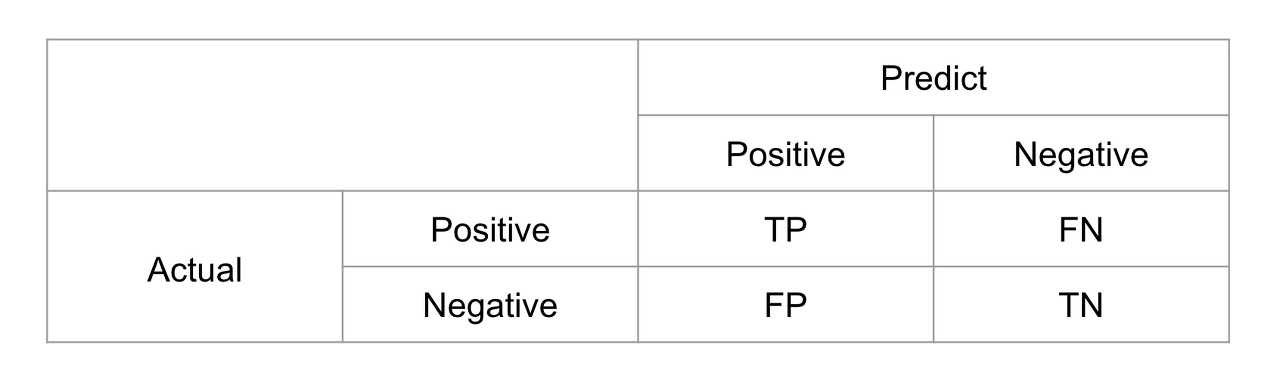

- TP(True Positive) : 긍정예측을 성공함. 즉, 환자라고 예측하고 실제환자임을 맞춤
- TN(True Negative) : 부정예측을 성공. 즉, 환자가 아니라 예측하고, 환자아님을 맞춤
- FP(False Positive) : 긍정예측을 실패. 즉, 환자라고 예측했지만 비환자임.
- FN(False Negative) : 부정예측을 실패, 즉, 비환자라고 예측했지만 실제환자임. 환장;;

Accuracy : 전체 예측한 것 중에 올바른 예측을 얼마나 했는지.

Accuracy = $\frac{올바르게 예측한 수} {전체 예측 수}$ = $\frac{TP + TN} {P + N}$

https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

## 시각화

In [ ]:
# countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.
# countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html
# countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.
sns.countplot(x="column_name", data=dataframe)
data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.